# 1. 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.io import loadmat
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import mglearn
import itertools
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns
sns.set_style('white')

# 2. 모델링 데이터 셋 생성

In [2]:
# 정상 데이터 생성
X_normal, y_normal = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=1, random_state=42)
df_normal = pd.DataFrame({'feature1': X_normal[:, 0], 'feature2': X_normal[:, 1], 'anomaly_indicator': 0})
# 이상 데이터 생성
X_anomaly, y_anomaly = make_blobs(n_samples=20, centers=2, n_features=2, cluster_std =10, random_state=0)
df_anomaly = pd.DataFrame({'feature1': X_anomaly[:, 0], 'feature2': X_anomaly[:, 1], 'anomaly_indicator': 1})
# 이상 데이터, 정상데이터 combine
df = pd.concat([df_normal, df_anomaly])
#데이터 출력
df

,feature1,feature2,anomaly_indicator
0,-5.730354,-7.583286,0
1,1.942992,1.918875,0
2,6.829682,1.164871,0
3,-2.901306,7.550771,0
4,5.841093,1.565094,0
...,...,...,...
15,14.358174,12.921462,1
16,-1.423854,2.461153,1
17,-15.007434,20.405418,1
18,15.917061,2.252205,1


In [3]:
# 데이터의 column 값 확인
print(df.keys())

Index(['feature1', 'feature2', 'anomaly_indicator'], dtype='object')


In [4]:
# X 값 확인
X = df[df.columns.difference(['anomaly_indicator'])]
y = df["anomaly_indicator"]
print('X:', X.shape)
X

X: (520, 2)


,feature1,feature2
0,-5.730354,-7.583286
1,1.942992,1.918875
2,6.829682,1.164871
3,-2.901306,7.550771
4,5.841093,1.565094
...,...,...
15,14.358174,12.921462
16,-1.423854,2.461153
17,-15.007434,20.405418
18,15.917061,2.252205


C:\Users\YUJIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feature1', ylabel='feature2'>

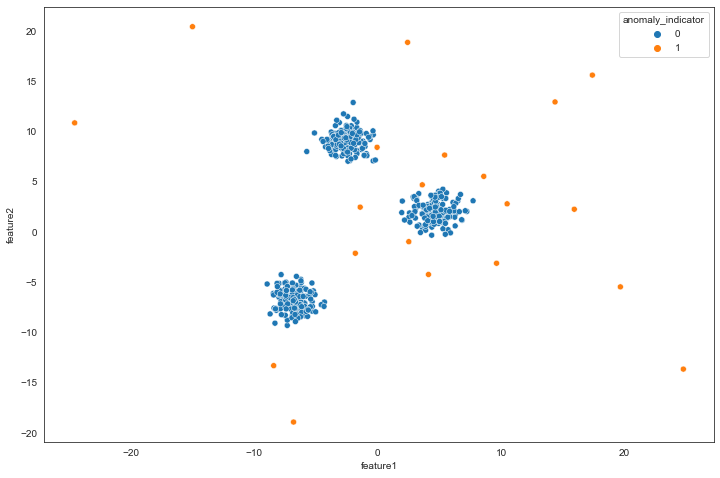

In [5]:
# 데이터 시각화 
plt.figure(figsize=(12, 8))
sns.scatterplot(df['feature1'], df['feature2'], hue=df['anomaly_indicator'])

In [6]:
# train과 test data를 0.75 : 0.25 비율로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], random_state=3)

# 3. 모델 구축

## 3-1. Gaussian Density Estimation

In [7]:
# gaussian 분포를 이용해 Outlier를 검출 모델
gde = EllipticEnvelope()
# 모델 fit
gde.fit(X_train)

EllipticEnvelope()

In [8]:
# train data에 대한 예측 값(정상=1, 이상=-1)
GDE_train_pred = gde.predict(X_train) 
GDE_train_pred

array([ 1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [9]:
# test data에 대한 예측 값(정상=1, 이상=-1)
GDE_test_pred = gde.predict(X_test) 
GDE_test_pred = pd.DataFrame(GDE_test_pred)
GDE_test_pred = GDE_test_pred.replace({-1: 1, 1: 0})
GDE_test_pred

,0
0,0
1,0
2,0
3,0
4,1
...,...
125,1
126,0
127,0
128,0


Text(0.5, 16.0, 'Predicted')

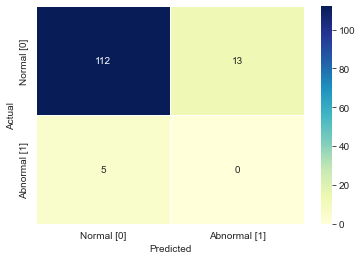

In [10]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, GDE_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

## 3-2. Mixture of Gaussian

In [11]:
#Hyperparameter
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
print("covariance : ", best_gmm.covariance_type)
print("n_components : ", best_gmm.n_components)

C:\Users\YUJIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\YUJIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\YUJIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\YUJIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.

covariance :  spherical
n_components :  4


In [12]:
# 모델 fit
y_gmm = best_gmm.fit_predict(X)

In [13]:
# test 각 샘플의 log-likelihood 계산
score = best_gmm.score_samples(X)

In [14]:
# score column에 저장
df['score'] = score

In [15]:
# threshold 설정(퍼센트) -> 이상치 4% 이상 값
pct_threshold = np.percentile(score, 4)
print(f'The threshold of the score is {pct_threshold:.2f}')

The threshold of the score is -7.77


In [16]:
# 이상치 레이블링
df['anomaly_gmm_pct'] = df['score'].apply(lambda x: 1 if x < pct_threshold else 0)

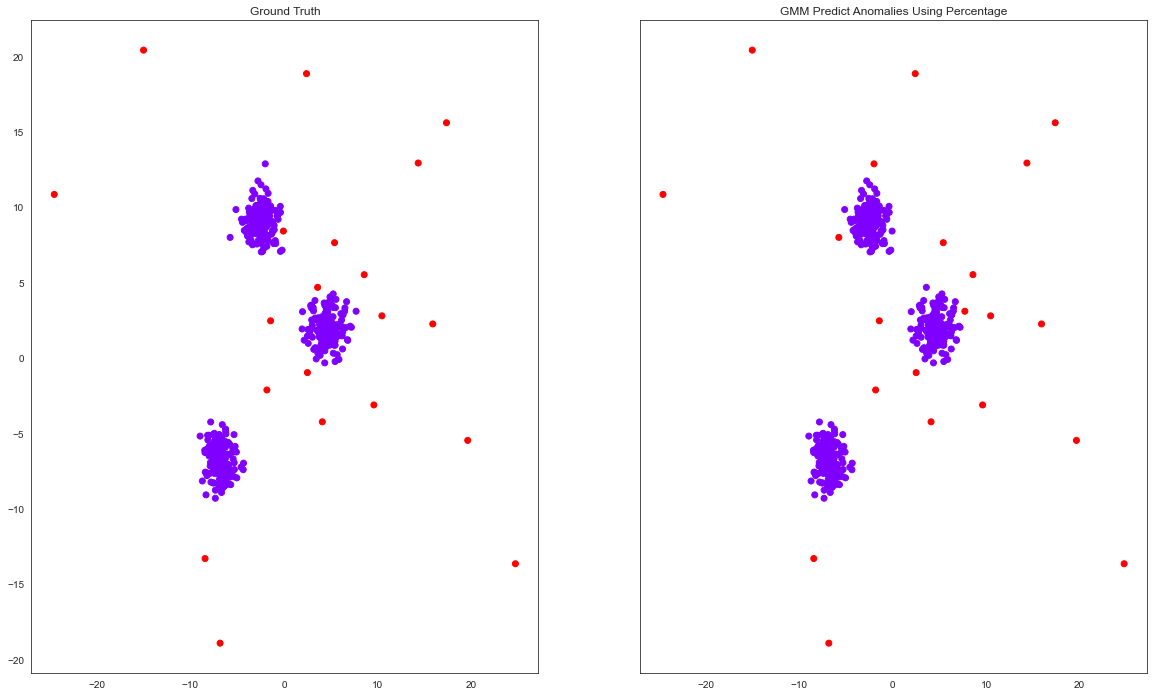

In [17]:
# 예측한 이상치와 실제 값 그래프
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,12))
# 실제
ax0.set_title('Ground Truth')
ax0.scatter(df['feature1'], df['feature2'], c=df['anomaly_indicator'], cmap='rainbow')
# 예측
ax1.set_title('GMM Predict Anomalies Using Percentage')
ax1.scatter(df['feature1'], df['feature2'], c=df['anomaly_gmm_pct'], cmap='rainbow')

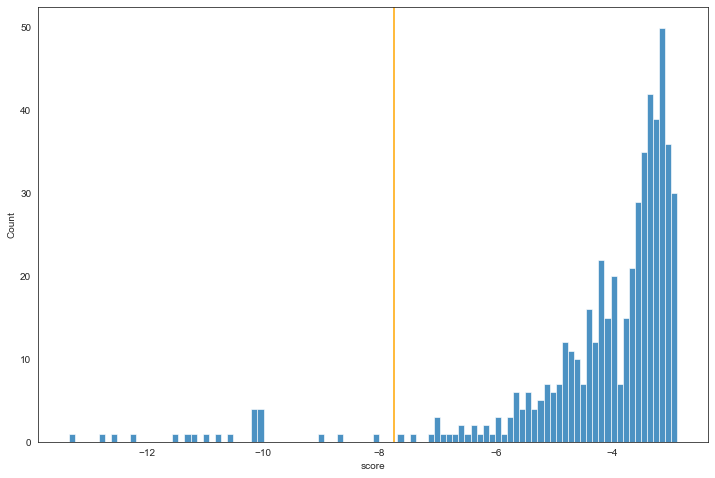

In [18]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
# score 분포
sns.histplot(df['score'], bins=100, alpha=0.8)
# Threshold 값(값 지정)
plt.axvline(x=-7.76, color='orange')
value_threshold = -7.76
# 이상치 레이블링
df['anomaly_gmm_value'] = df['score'].apply(lambda x: 1 if x < value_threshold else 0)

In [19]:
# test data에 대한 예측 값(정상=0, 이상=-1)
MOG_test_pred = best_gmm.predict(X_test) 
MOG_test_pred = pd.DataFrame(MOG_test_pred)
MOG_test_pred = MOG_test_pred.replace({1:0,2:0,3:0})
MOG_test_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
125,0
126,0
127,0
128,0


Text(0.5, 16.0, 'Predicted')

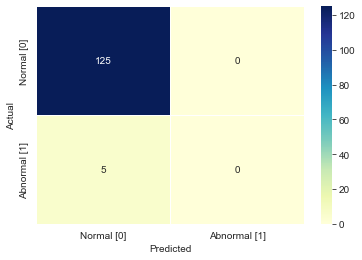

In [20]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, MOG_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 3-3. K-Nearst-Neighbors

In [21]:
#Hyperparameter
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [22]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [23]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [24]:
g_res.best_score_

0.9717948717948718

In [25]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [26]:
#값을 직접 입력
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', weights='distance')

In [27]:
KNN_train_pred = knn.predict(X_train)
KNN_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
KNN_test_pred = knn.predict(X_test)
KNN_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
#train, test 정확도 확인
print('Training set accuracy: ', metrics.accuracy_score(y_train, KNN_train_pred))
print('Test set accuracy: ',metrics.accuracy_score(y_test, KNN_test_pred))

Training set accuracy:  1.0
Test set accuracy:  0.9615384615384616


Text(0.5, 16.0, 'Predicted')

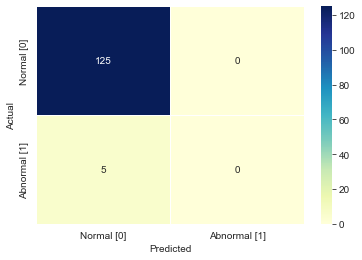

In [30]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, KNN_test_pred)

sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

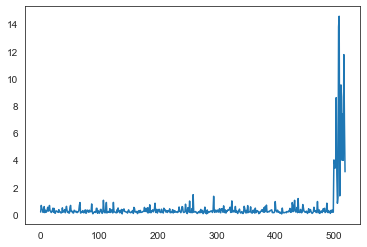

In [31]:
# 모델에서 k-neighbors의 거리 및 인덱스 출력 
distances, indexes = knn.kneighbors(X)
# 각 관측치의 k-거리에 대한 플롯 평균 
plt.plot(distances.mean(axis =1))

In [32]:
# 컷오프 값을 시각적으로 결정 > 2 
outlier_index = np.where(distances.mean(axis = 1) > 2) 
outlier_index

(array([500, 501, 502, 503, 504, 505, 508, 509, 511, 512, 513, 514, 515,
        516, 517, 518, 519], dtype=int64),)

In [33]:
# 이상값 필터링 
outlier_values = df.iloc[outlier_index] 
outlier_values

,feature1,feature2,anomaly_indicator,score,anomaly_gmm_pct,anomaly_gmm_value
0,9.620632,-3.117863,1,-10.204993,1,1
1,-8.430262,-13.302516,1,-11.525960,1,1
2,4.106947,-4.237170,1,-10.122074,1,1
3,10.477154,2.790215,1,-10.113400,1,1
4,19.651850,-5.468991,1,-11.207179,1,1
5,5.414902,7.640531,1,-10.037733,1,1
8,24.752814,-13.645993,1,-12.751230,1,1
9,-24.553628,10.839973,1,-13.345858,1,1
11,-6.822590,-18.910301,1,-12.218319,1,1
12,17.383060,15.591251,1,-11.331432,1,1


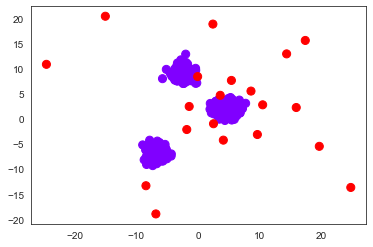

In [34]:
#정상 그래프
plt.scatter(df['feature1'], df['feature2'], c=df['anomaly_indicator'], cmap='rainbow', s = 65)

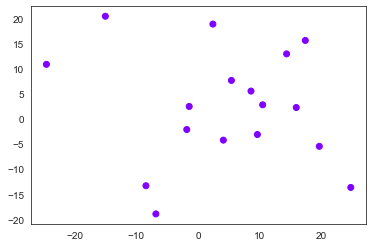

In [35]:
#이상치 그래프
plt.scatter(outlier_values['feature1'], outlier_values['feature2'], c=outlier_values['anomaly_indicator'], cmap='rainbow')

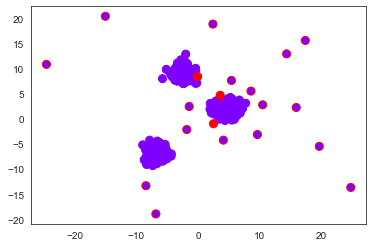

In [36]:
#이상 데이터 시각화
# 플롯 데이터 
plt.scatter(df['feature1'], df['feature2'], c=df['anomaly_indicator'], cmap='rainbow', s = 65)
# 이상값 플롯 
plt.scatter(outlier_values['feature1'], outlier_values['feature2'], c=outlier_values['anomaly_indicator'], cmap='rainbow')

# 3-4. K-Means

In [37]:
# K-Means 클러스터링 함수 실행 후 차트 가시화
def k_Means_Plot(Data, Select_k, NAME, Init_Method = 'k-means++', Num_Init=10):
    global sum_of_squared_distance
    sum_of_squared_distance = []
    Data2 = Data[['feature1', 'feature2']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
        Kmeans_Clustering.fit(Data2)
        mglearn.discrete_scatter(Data2['feature1'], Data2['feature2'], Kmeans_Clustering.labels_, ax=axes[i - 2], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], 
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), 
                                 markeredgewidth=3, 
                                 ax=axes[i - 2], s=10)
        Score = np.round(silhouette_score(Data2, Kmeans_Clustering.labels_),2)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))
        sum_of_squared_distance.append(Kmeans_Clustering.inertia_)

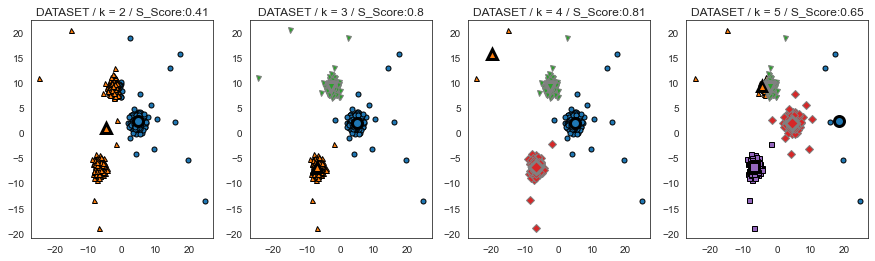

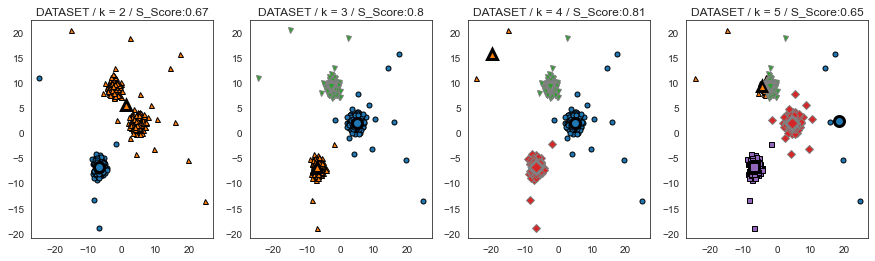

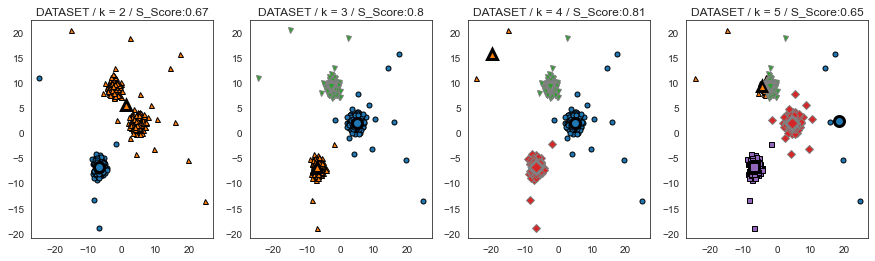

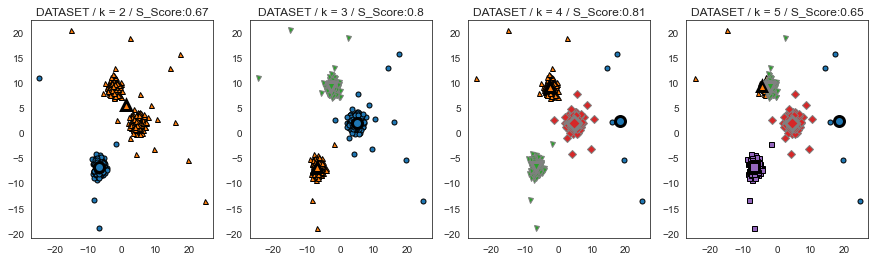

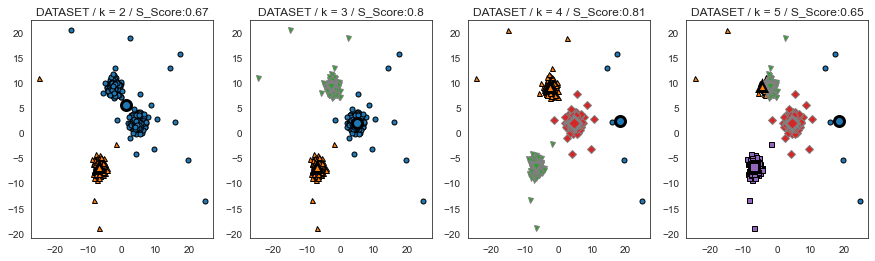

In [38]:
for i in range(1,10,2):
    k_Means_Plot(Data = df,
                    Select_k = range(2, 6),
                    NAME = "DATASET",
                    Init_Method='random',Num_Init=i)

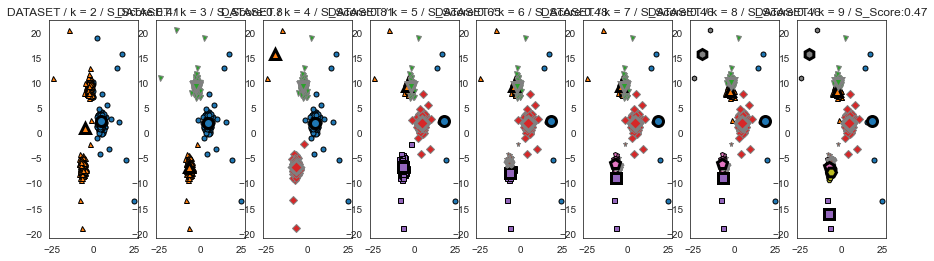

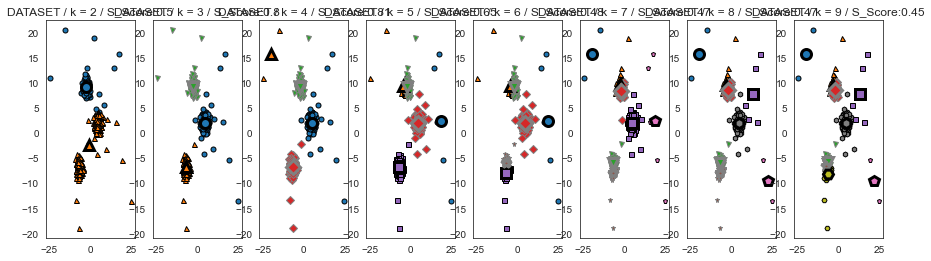

In [39]:
for i in range(1,3):
    k_Means_Plot(Data = df,
                    Select_k = range(2, 10),
                    NAME = "DATASET",
                    Init_Method='random',Num_Init=i)

Text(0, 0.5, 'Inertia')

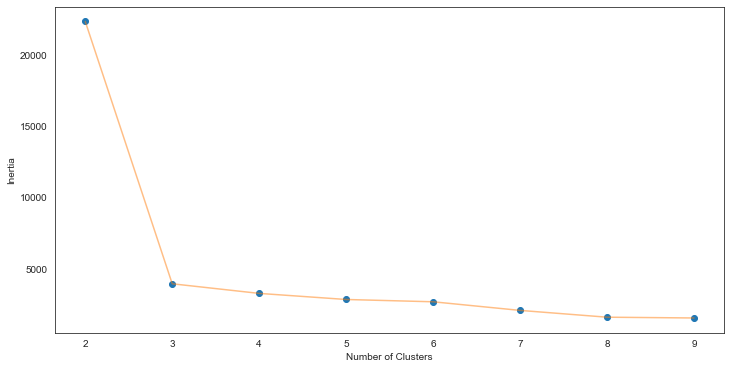

In [40]:
#cluster 수 찾기
plt.figure(1 , figsize = (12, 6))
plt.plot(range(2, 10) , sum_of_squared_distance , 'o')
plt.plot(range(2, 10) , sum_of_squared_distance , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [41]:
# 모델 fit
km = KMeans(n_clusters=3)
model = km.fit(X)

In [42]:
colors=["red","blue","green","orange"]

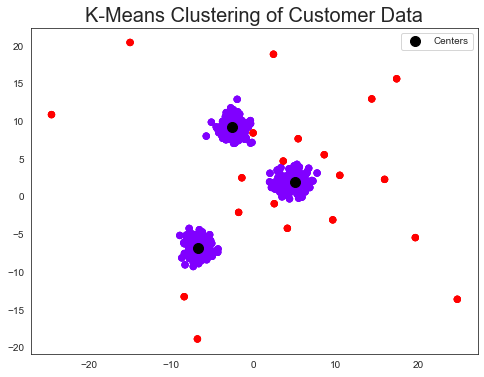

In [43]:
# 시각화
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(df['feature1'], df['feature2'], c=df['anomaly_indicator'], cmap='rainbow', s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Customer Data",size=20)
plt.legend()
plt.show()

In [44]:
# Outlier detection
# 각 센터에서 데이터의 거리를 계산
def distance_from_center(income, score, y, label) :
    center_income = model.cluster_centers_[label, 0]
    center_score = model.cluster_centers_[label, 1]
    dist = np.sqrt((income - center_income) ** 2 + (score - center_score))
    return np.round(dist, 3)

df['label'] = model.labels_
df['distance'] = distance_from_center(df.feature1, df.feature2, df.anomaly_indicator, df.label)

df.head()

C:\Users\YUJIN\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,feature1,feature2,anomaly_indicator,score,anomaly_gmm_pct,anomaly_gmm_value,label,distance
0,-5.730354,-7.583286,0,-3.927935,0,0,1,0.651
1,1.942992,1.918875,0,-6.310925,0,0,0,3.084
2,6.829682,1.164871,0,-5.635150,0,0,0,1.569
3,-2.901306,7.550771,0,-4.155699,0,0,2,NaN
4,5.841093,1.565094,0,-3.819986,0,0,0,0.532


In [45]:
#군집에서 멀리 떨어진 데이터 확인->내림차순
outlier_indexs = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outlier_indexs)]
print(outliers)

     feature1   feature2  anomaly_indicator      score  anomaly_gmm_pct  \
3   -2.901306   7.550771                  0  -4.155699                0   
4    5.841093   1.565094                  0  -3.819986                0   
8    3.572258   1.830790                  0  -3.528471                0   
9   -7.504446  -6.854019                  0  -3.135775                0   
12  -0.376164   7.062198                  0  -7.424531                0   
13  -1.938307  10.149852                  0  -3.756061                0   
15   5.698303   0.214430                  0  -4.980657                0   
16  -2.581208  10.017819                  0  -3.429885                0   
17  -8.002349  -6.497700                  0  -3.675426                0   
18  -6.797343  -5.814629                  0  -3.371397                0   
3   10.477154   2.790215                  1 -10.113400                1   
4   19.651850  -5.468991                  1 -11.207179                1   
8   24.752814 -13.645993 

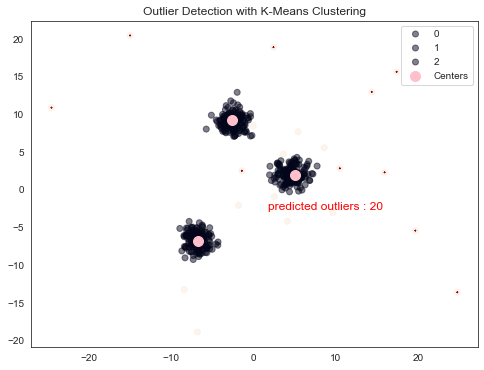

In [46]:
# outlier 시각화
plt.figure(figsize=(8, 6))
for i in range(np.max(model.labels_)+1) :
    plt.scatter(df[model.labels_==i].feature1, df[model.labels_==i].feature2,
               c = df[model.labels_==i].anomaly_indicator, label=i, alpha=0.5)
plt.scatter(outliers.feature1, outliers.feature2, outliers.anomaly_indicator, c='darkred', marker='x')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
           label='Centers', c='pink', s=100)
plt.title('Outlier Detection with K-Means Clustering')
plt.legend()

plt.text(1.8, -2.6, f'predicted outliers : {len(outliers)}',fontdict={'color':'red', 'size':12})
plt.show()